# CKD Prediction
---
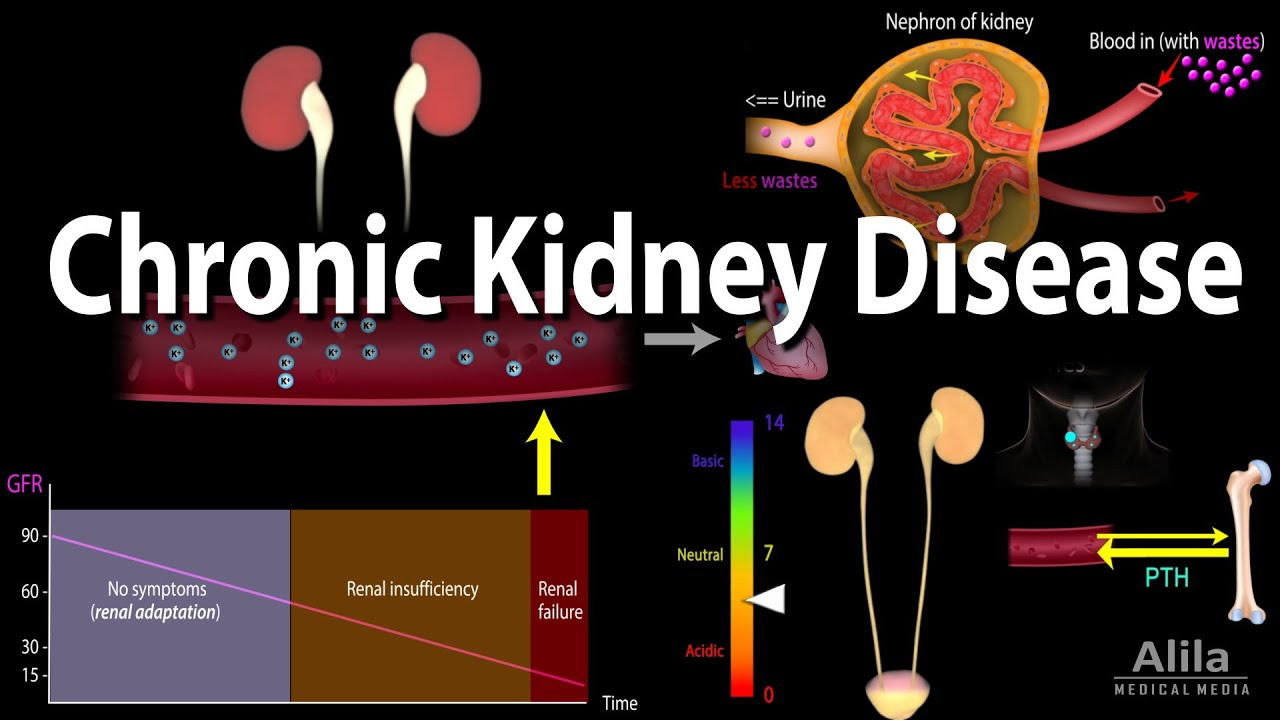

In this project I will show you how to create predictive machine learning model using python program to predict and classify patience as having chronic kidney disease (ckd) or not. 

Chronic kidney disease, also called chronic kidney failure, describes the gradual loss of kidney function. Your kidneys filter wastes and excess fluids from your blood, which are then excreted in your urine. When chronic kidney disease reaches an advanced stage, dangerous levels of fluid, electrolytes and wastes can build up in your body. -Mayo Clinic

In the early stages of chronic kidney disease, you may have few signs or symptoms. Chronic kidney disease may not become apparent until your kidney function is significantly impaired. -Mayo Clinic

Treatment for chronic kidney disease focuses on slowing the progression of the kidney damage, usually by controlling the underlying cause. Chronic kidney disease can progress to end-stage kidney failure, which is fatal without artificial filtering (dialysis) or a kidney transplant. -Mayo Clinic

### Table of Contents
1. Data Pre Processing
2. EDA
3. Feature Encoding
4. Model Building
    * Knn
    * Decision Tree Classifier
    * Random Forest Classifier
    * Ada Boost Classifier
    * Gradient Boosting Classifier
    * Stochastic Gradient Boosting (SGB)
    * XgBoost
    * Cat Boost Classifier
    * Extra Trees Classifier
    * LGBM Classifier
5. Models Comparison

### Data Set Information
acknowledgements: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
* Age(numerical) - age in years
* Blood Pressure(numerical) - bp in mm/Hg
* Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)
* Albumin(nominal) - al - (0,1,2,3,4,5)
* Sugar(nominal) - su - (0,1,2,3,4,5)
* Red Blood Cells(nominal) - rbc - (normal,abnormal)
* Pus Cell (nominal) - pc - (normal,abnormal)
* Pus Cell clumps(nominal) - pcc - (present,notpresent)
* Bacteria(nominal) - ba - (present,notpresent)
* Blood Glucose Random(numerical) - bgr in mgs/dl
* Blood Urea(numerical) -bu in mgs/dl
* Serum Creatinine(numerical) - sc in mgs/dl
* Sodium(numerical) - sod in mEq/L
* Potassium(numerical) - pot in mEq/L
* Hemoglobin(numerical) - hemo in gms
* Packed Cell Volume(numerical)
* White Blood Cell Count(numerical) - wc in cells/cumm
* Red Blood Cell Count(numerical) - rc in millions/cmm
* Hypertension(nominal) - htn - (yes,no)
* Diabetes Mellitus(nominal) - dm - (yes,no)
* Coronary Artery Disease(nominal) - cad - (yes,no)
* Appetite(nominal) - appet - (good,poor)
* Pedal Edema(nominal) - pe - (yes,no)
* Anemia(nominal) - ane - (yes,no)
* Class (nominal)- class - (ckd,notckd)

## Data Pre Processing

In [1]:
# necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
# import dataset 
data_file = pd.read_csv("kidney_disease.csv")
# view dataset
data_file

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
# get a concise summary of the dataset
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
# check the null value for each column 
data_file.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
# Percentage of missing values
((data_file.isnull().sum()/data_file.shape[0])*100).sort_values(ascending=False)

rbc               38.00
rc                32.50
wc                26.25
pot               22.00
sod               21.75
pcv               17.50
pc                16.25
hemo              13.00
su                12.25
sg                11.75
al                11.50
bgr               11.00
bu                 4.75
sc                 4.25
bp                 3.00
age                2.25
ba                 1.00
pcc                1.00
htn                0.50
dm                 0.50
cad                0.50
ane                0.25
appet              0.25
pe                 0.25
id                 0.00
classification     0.00
dtype: float64

In [6]:
# check if the dataset holds duplicate values
data_file.duplicated().any()

False

From the above we can learn that some columns of th edataset have high percentage of missing values and the dataset has no duplicated row of data. We would drop some columns that they won't help us to find deep insights from the dataset.

In [7]:
#drop id column because it is a unique identifier for each row and won't help us to find any insights from the data
data_file.drop(["id"],axis=1,inplace=True) 

In [8]:
# rename column names to make it more user-friendly

data_file.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [9]:
data_file

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
# get a concise summary of the dataset
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
# change some variables to numerical dtype, helping ther model to better learn the dataset
data_file['packed_cell_volume'] = pd.to_numeric(data_file['packed_cell_volume'], errors='coerce')
data_file['white_blood_cell_count'] = pd.to_numeric(data_file['white_blood_cell_count'], errors='coerce')
data_file['red_blood_cell_count'] = pd.to_numeric(data_file['red_blood_cell_count'], errors='coerce')

In [12]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [13]:
# extract the categorical columns
cat_cols = [col for col in data_file.columns if data_file[col].dtype == 'object']
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [14]:
# extract the categorical columns
num_cols = [col for col in data_file.columns if data_file[col].dtype != 'object']
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [15]:
# looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col}: {data_file[col].unique()} \n")

red_blood_cells: [nan 'normal' 'abnormal'] 

pus_cell: ['normal' 'abnormal' nan] 

pus_cell_clumps: ['notpresent' 'present' nan] 

bacteria: ['notpresent' 'present' nan] 

hypertension: ['yes' 'no' nan] 

diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan] 

coronary_artery_disease: ['no' 'yes' '\tno' nan] 

appetite: ['good' 'poor' nan] 

peda_edema: ['no' 'yes' nan] 

aanemia: ['no' 'yes' nan] 

class: ['ckd' 'ckd\t' 'notckd'] 



In [16]:
# some columns have unclear lables, so we need to clearify them or remove them 
data_file['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

data_file['coronary_artery_disease'] = data_file['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

data_file['class'] = data_file['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [17]:
# change "class" column into boolean value
data_file['class'] = data_file['class'].map({'ckd': 0, 'not ckd': 1})
data_file['class'] = pd.to_numeric(data_file['class'], errors='coerce')

In [18]:
# looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col}: {data_file[col].unique()} \n")

red_blood_cells: [nan 'normal' 'abnormal'] 

pus_cell: ['normal' 'abnormal' nan] 

pus_cell_clumps: ['notpresent' 'present' nan] 

bacteria: ['notpresent' 'present' nan] 

hypertension: ['yes' 'no' nan] 

diabetes_mellitus: ['yes' 'no' nan] 

coronary_artery_disease: ['no' 'yes' nan] 

appetite: ['good' 'poor' nan] 

peda_edema: ['no' 'yes' nan] 

aanemia: ['no' 'yes' nan] 

class: [0 1] 



## Exploratory Data Analysis (EDA)

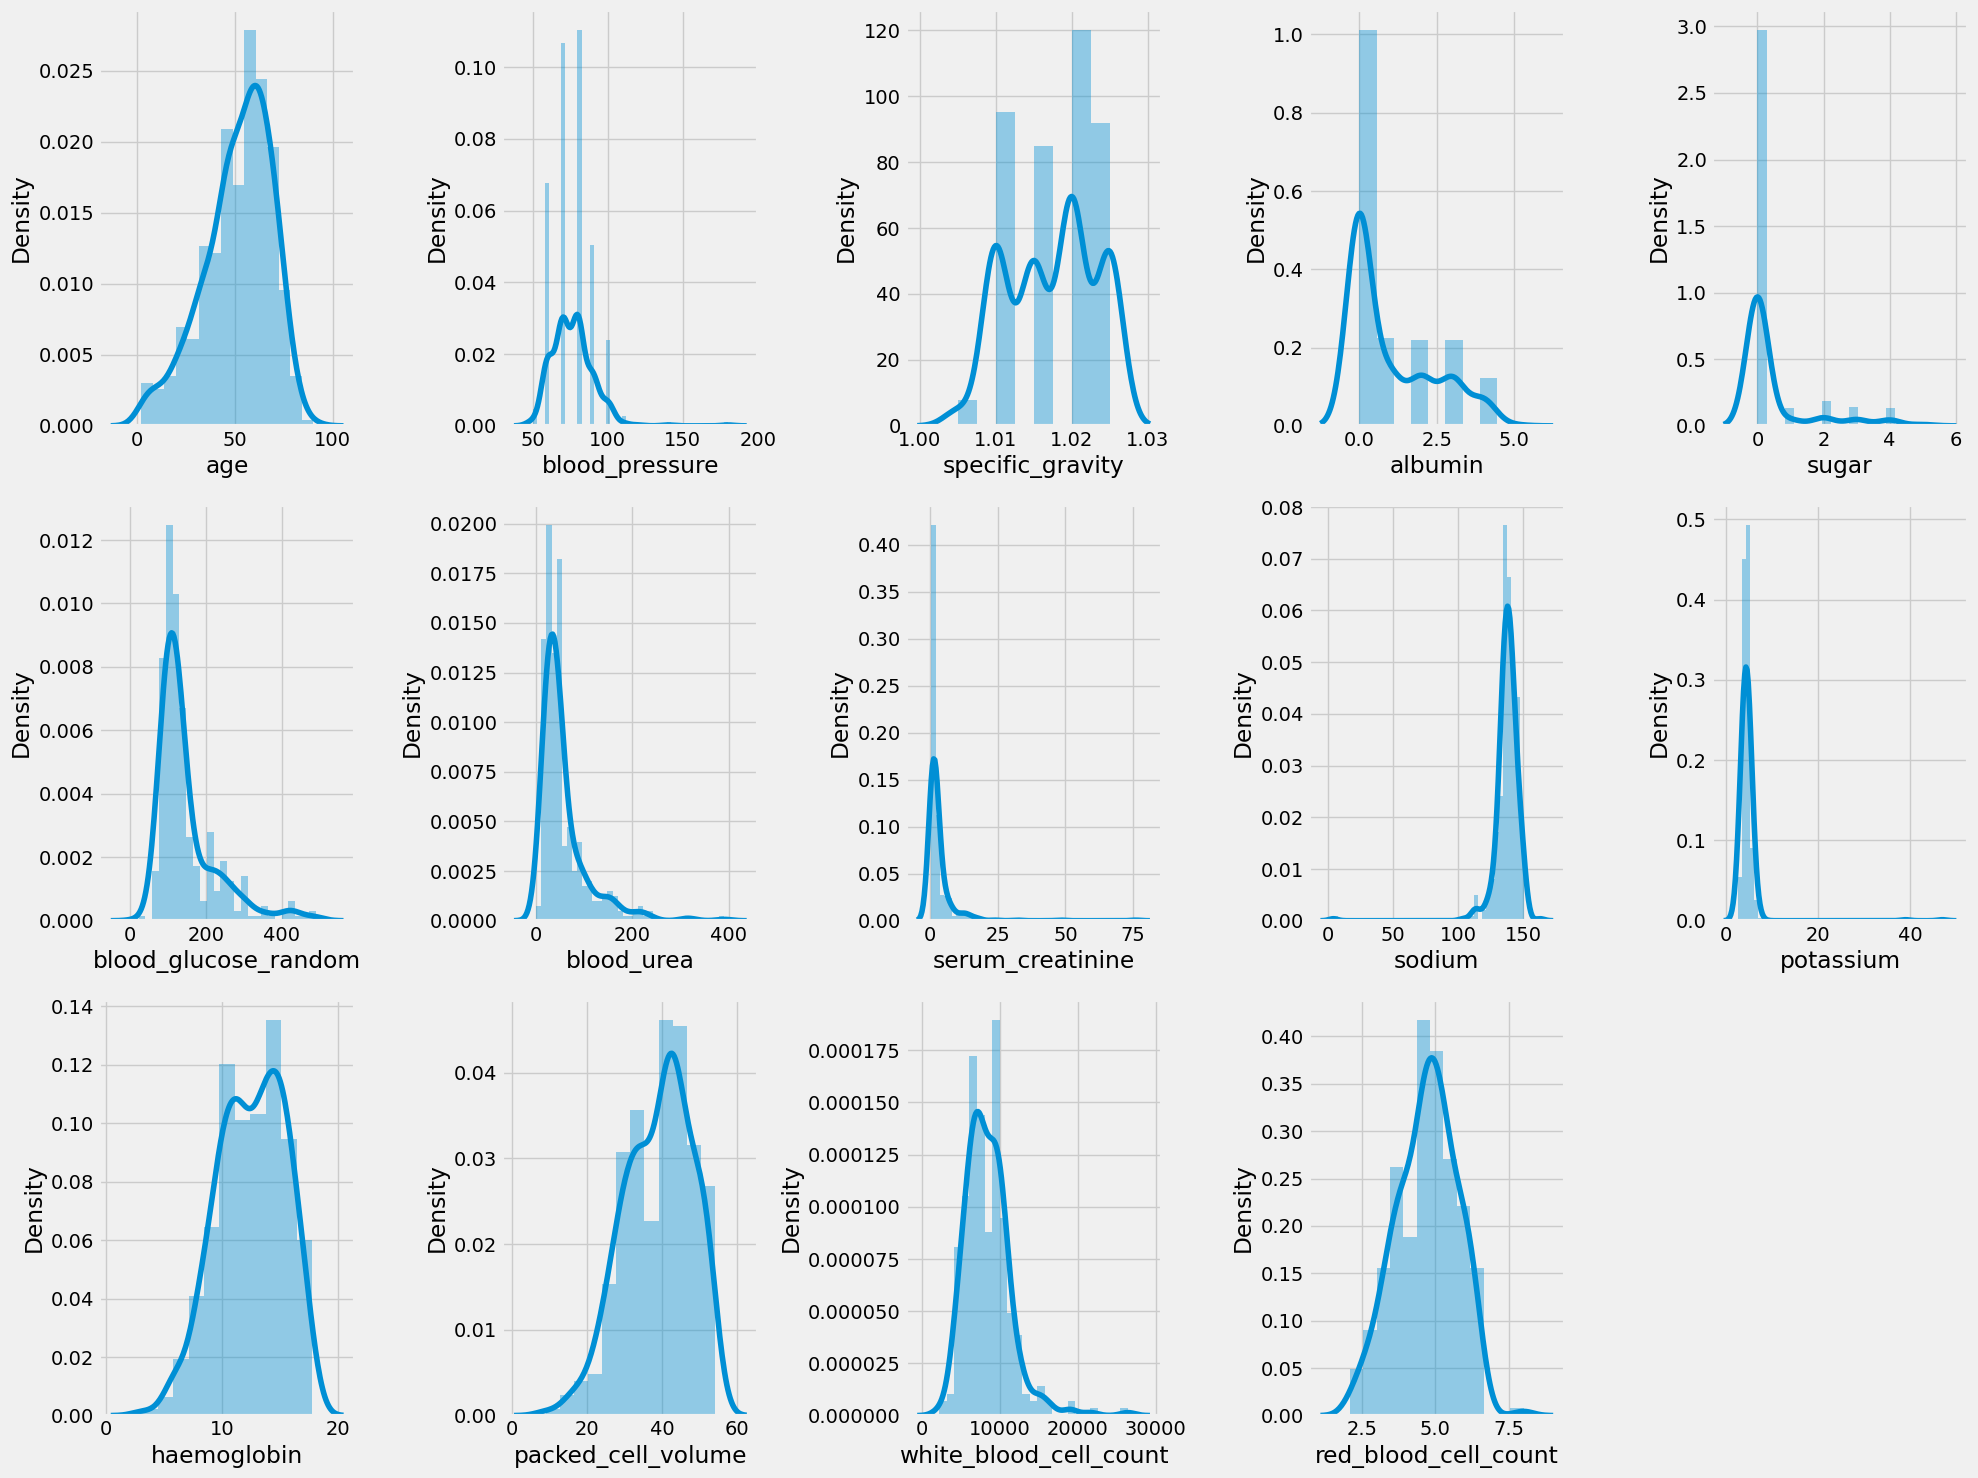

In [19]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_file[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Skewness is present in some of the columns.
        Observations:
        1.age looks a bit left skewed
        2.Blood gluscose random is right skewed
        3.Blood Urea is also a bit right skewed
        4.Rest of the features are lightly skewed

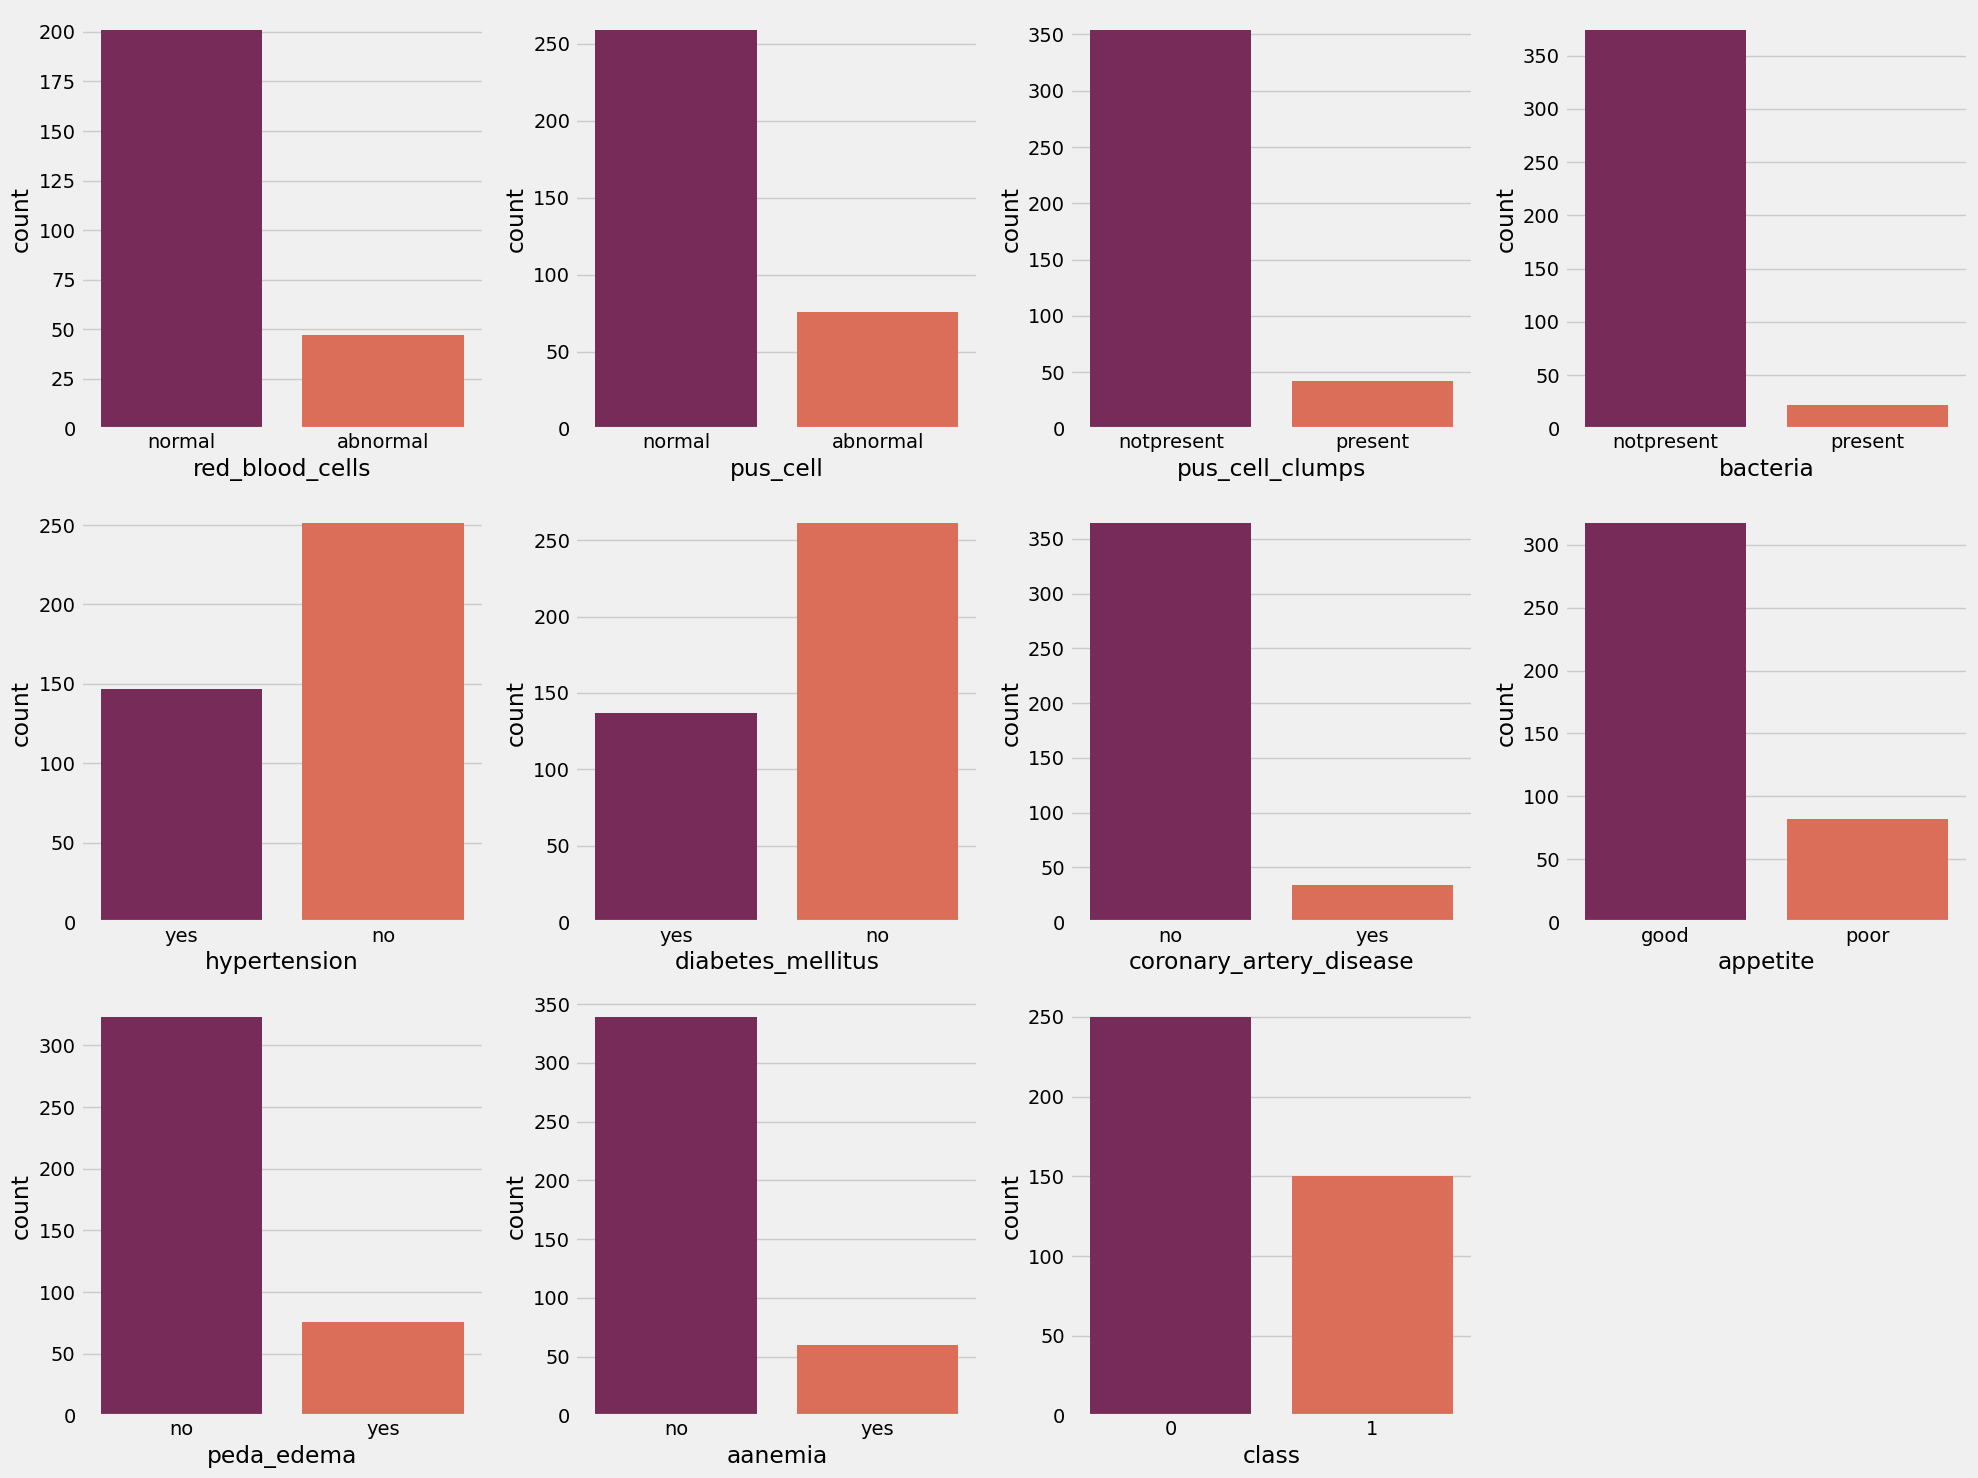

In [20]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data_file[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

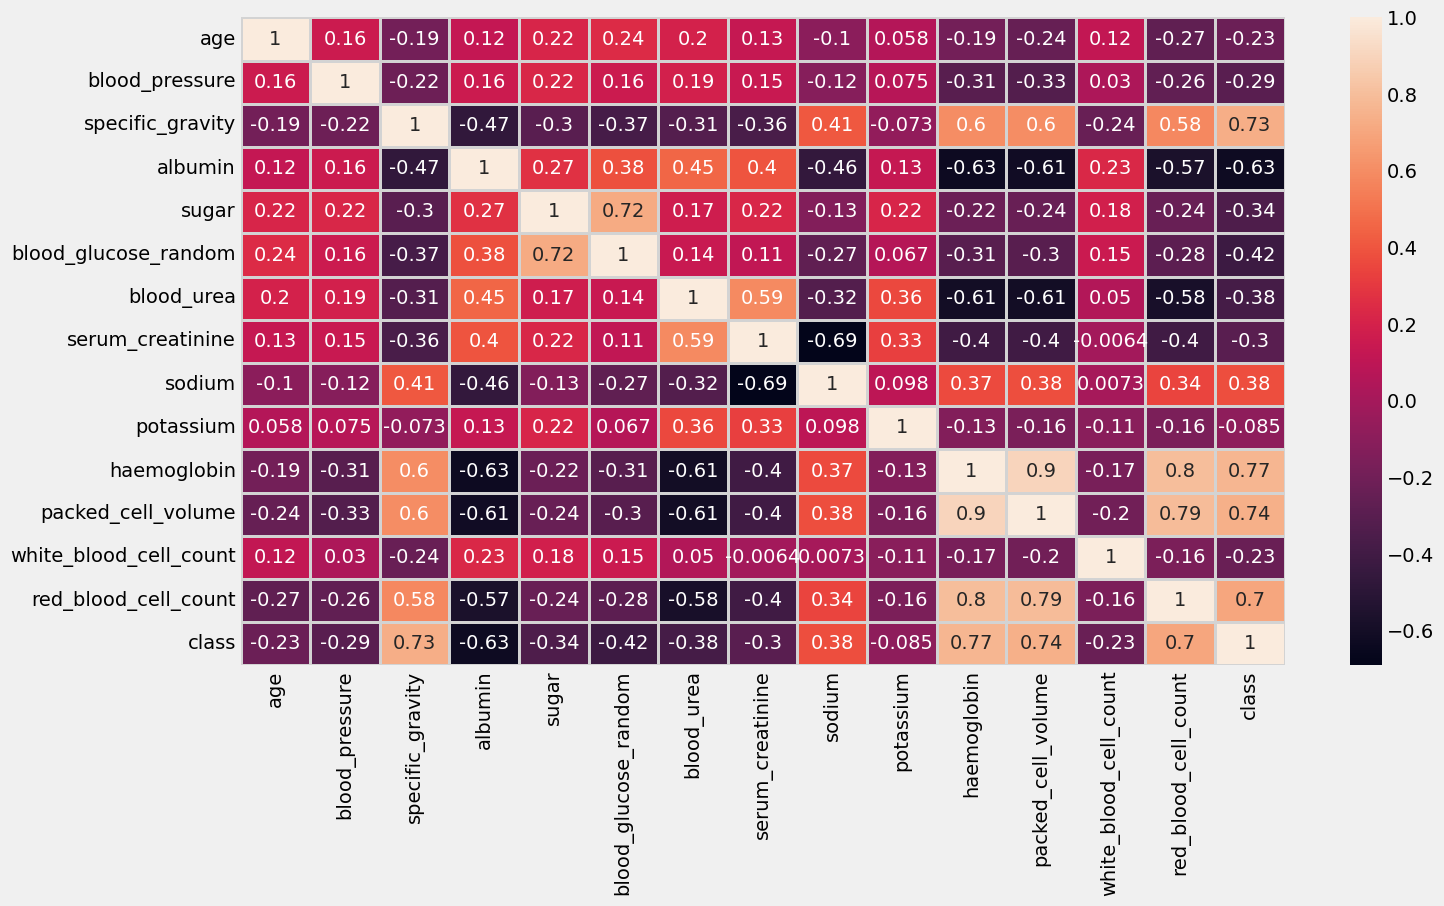

In [21]:
# create heatmap graph to learn the relationships between two variables

plt.figure(figsize = (15, 8))

sns.heatmap(data_file.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

Positive Correlation:
* Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin 
* Sugar -> Blood glucose random
* Blood Urea -> Serum creatinine
* Hemoglobin -> Red Blood cell count <- packed cell volume


Negative Correlation:
* Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
* Serum creatinine -> Sodium

In [22]:
# defining functions to create plot

def violin(col):
    fig = px.violin(data_file, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(data_file, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(data_file, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [23]:
violin('red_blood_cell_count')

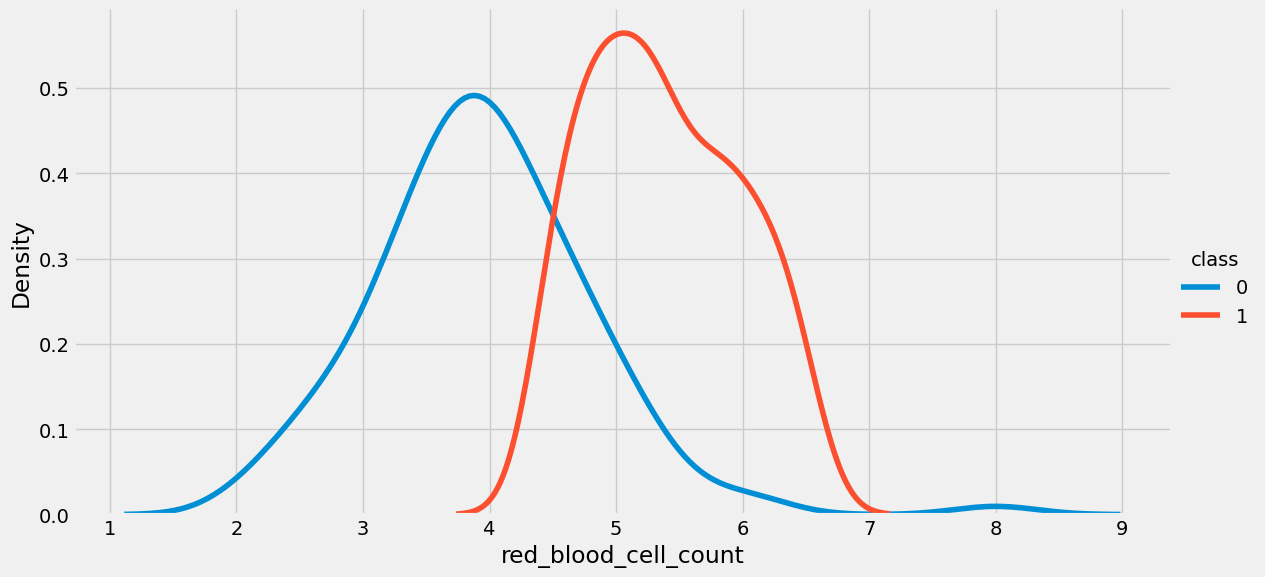

In [24]:
kde('red_blood_cell_count')

In [25]:
violin('white_blood_cell_count')

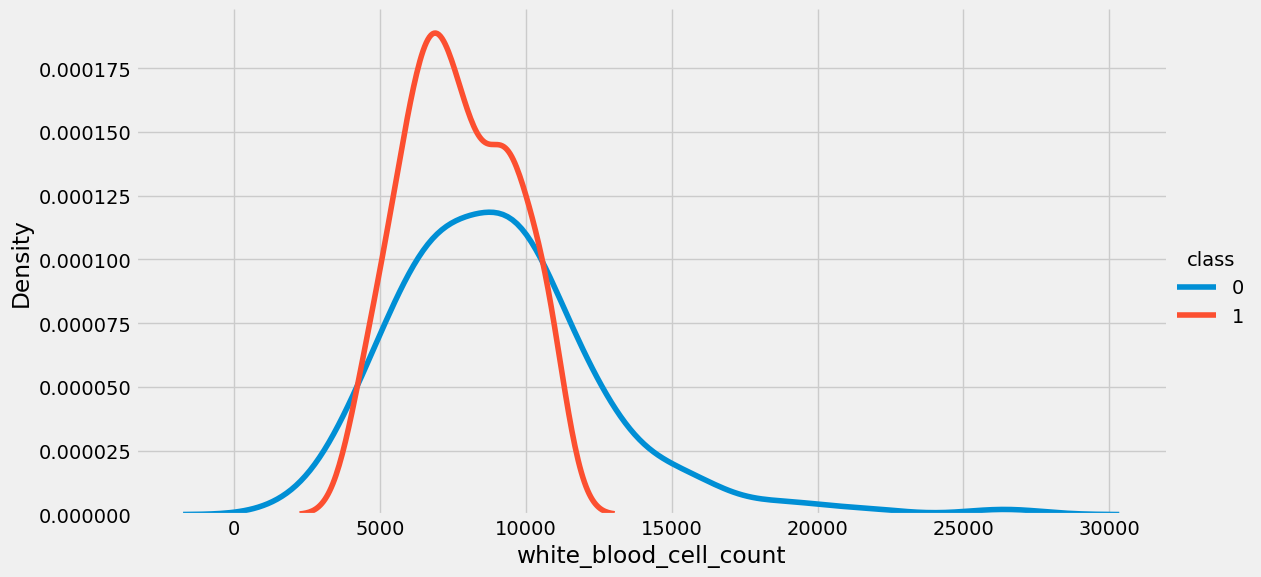

In [26]:
kde('white_blood_cell_count')

In [27]:
violin('packed_cell_volume')

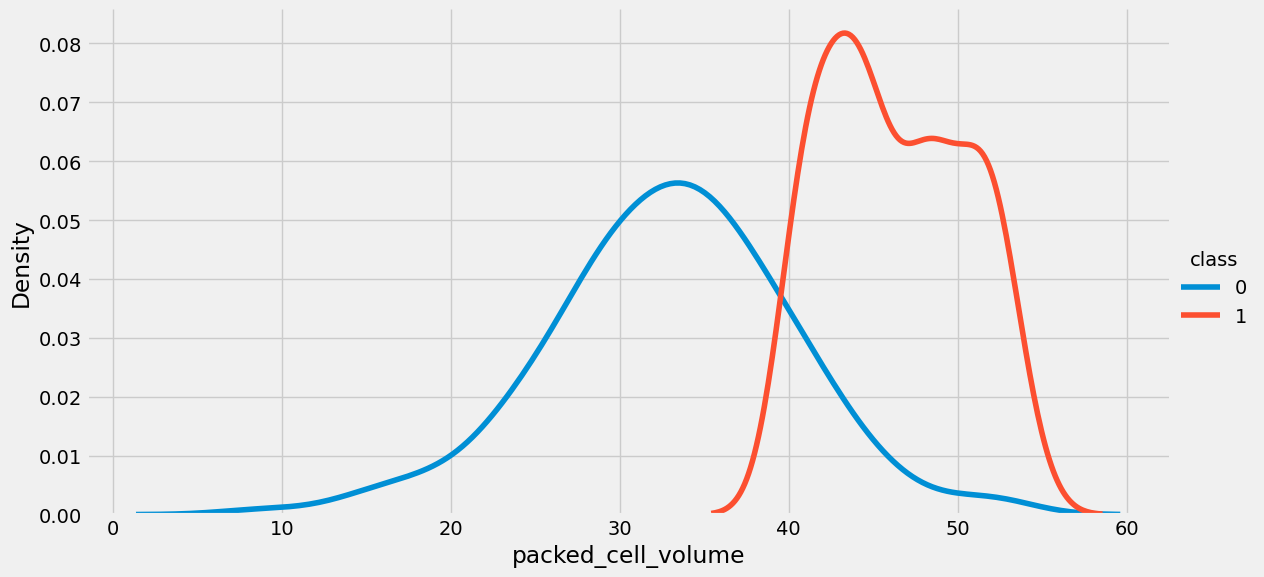

In [28]:
kde('packed_cell_volume')

In [29]:
violin('haemoglobin')

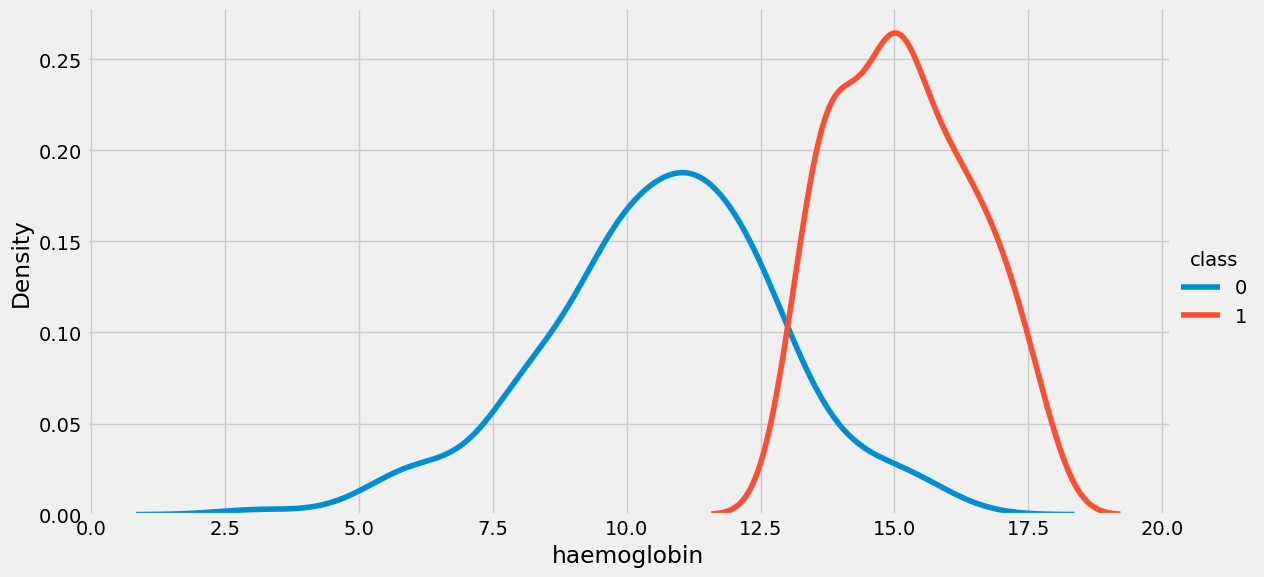

In [30]:
kde('haemoglobin')

In [31]:
violin('albumin')

/Users/ivanmeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



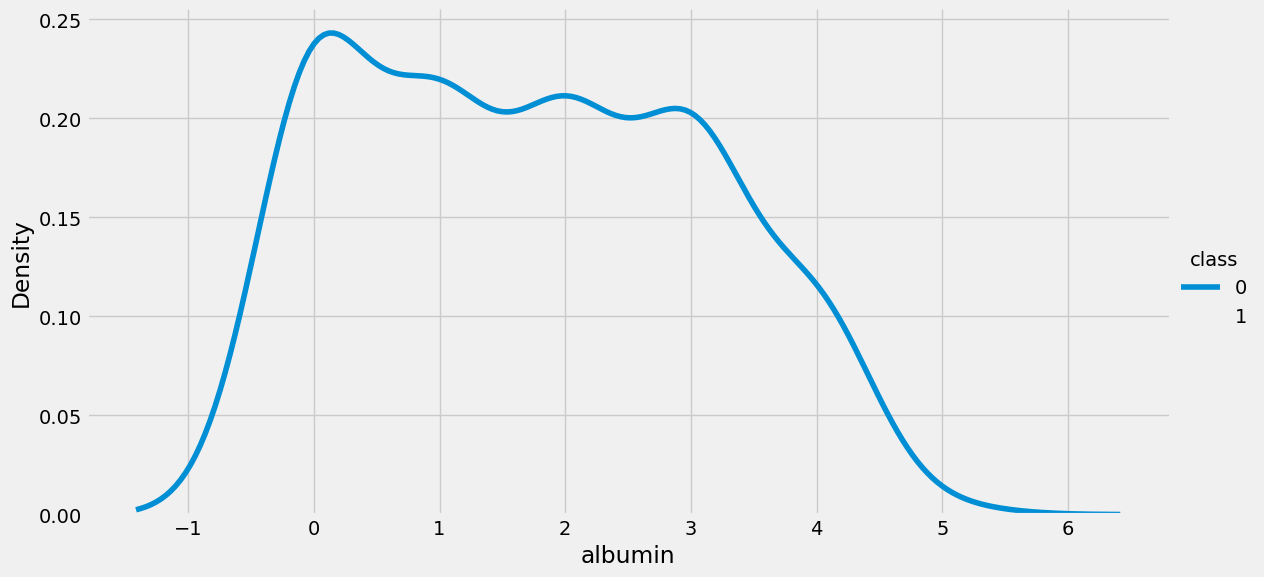

In [32]:
kde('albumin')

In [33]:
violin('blood_glucose_random')

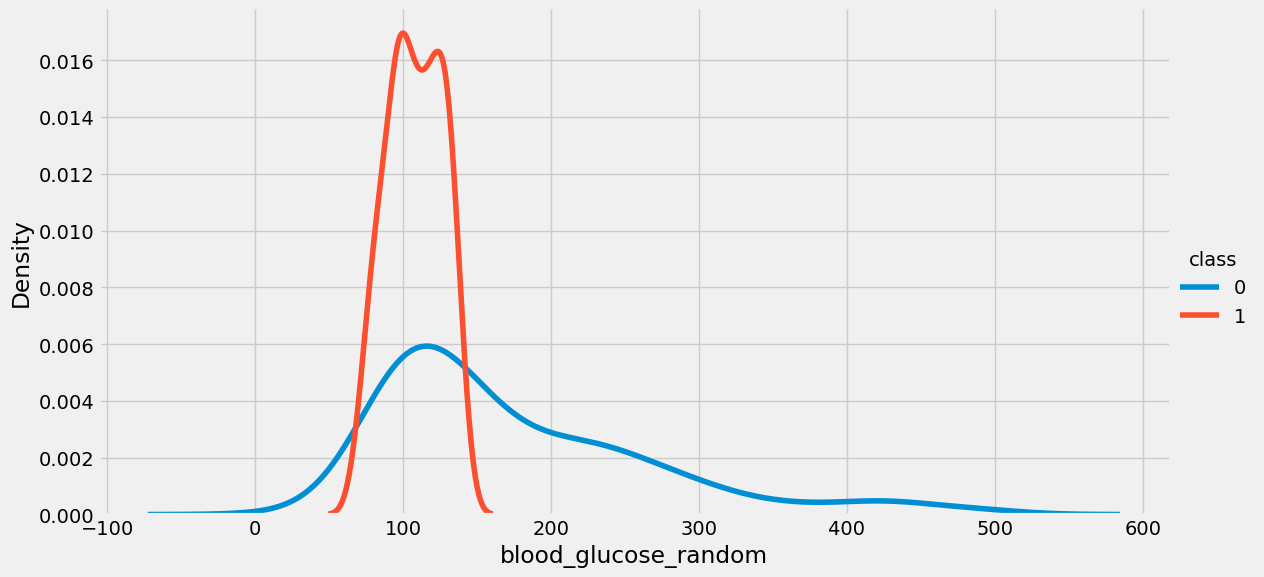

In [34]:
kde('blood_glucose_random')

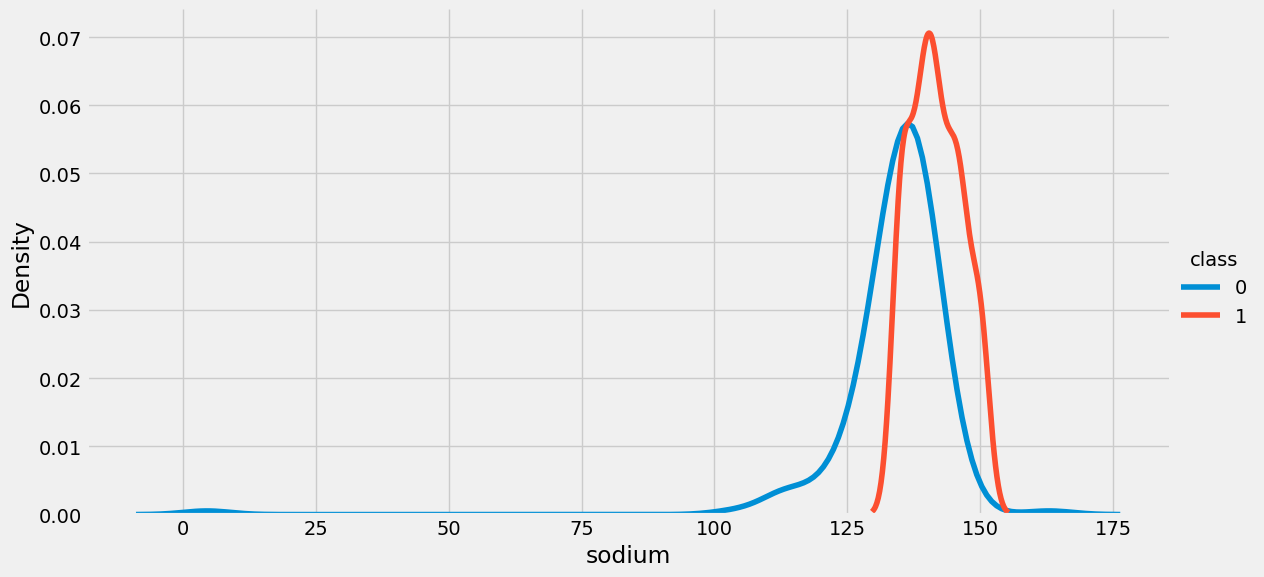

In [35]:
kde('sodium')

In [36]:
violin('blood_urea')

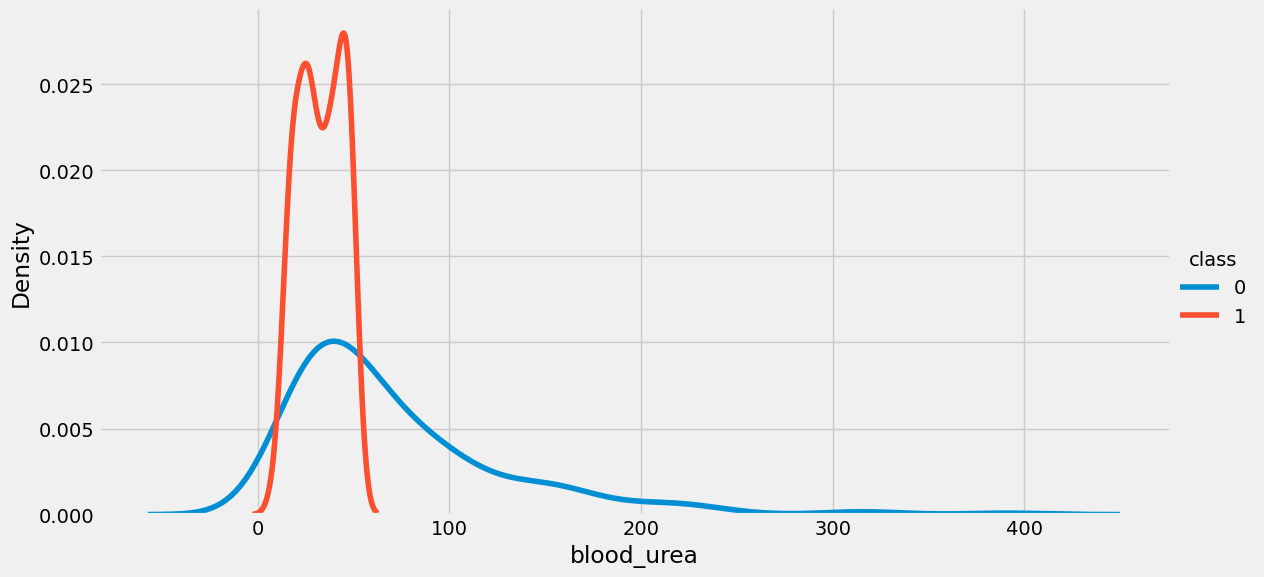

In [37]:
kde('blood_urea')

In [38]:
violin('specific_gravity')

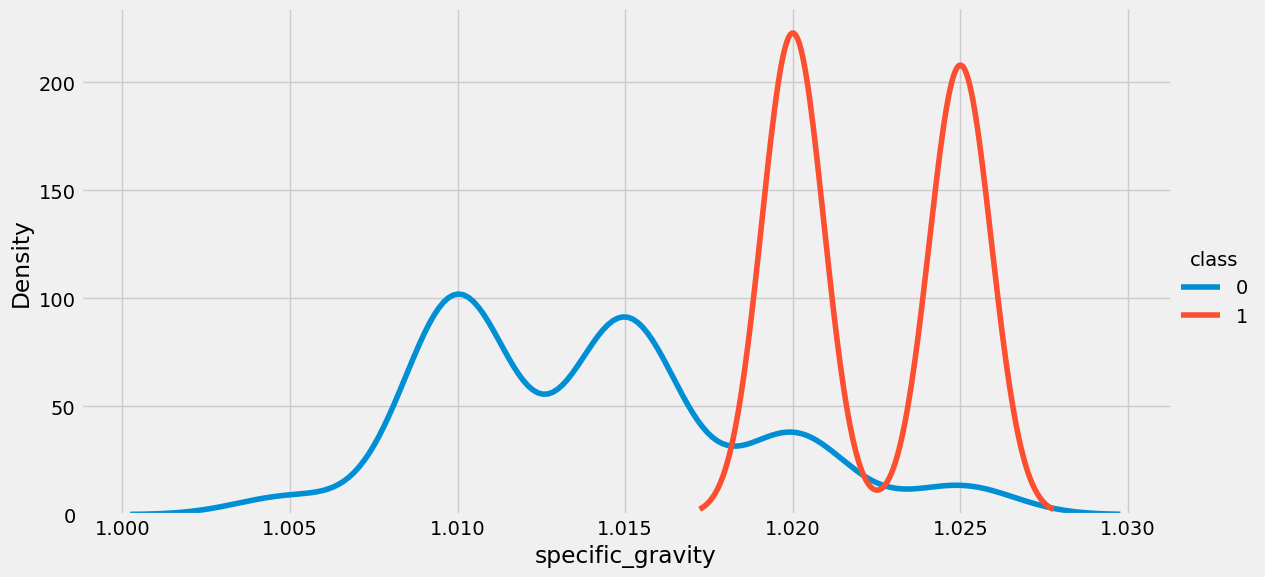

In [39]:
kde('specific_gravity')

In [40]:
scatter('haemoglobin', 'packed_cell_volume')

In [41]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [42]:
scatter('red_blood_cell_count', 'albumin')

In [43]:
scatter('sugar', 'blood_glucose_random')

In [44]:
scatter('packed_cell_volume','blood_urea')

In [45]:
px.bar(data_file, x="specific_gravity", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [46]:
px.bar(data_file, x="specific_gravity", y="albumin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [47]:
px.bar(data_file, x="blood_pressure", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [48]:
px.bar(data_file, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)

## Feature Encoding

In [49]:
# checking for null values
data_file.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [50]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = data_file[feature].dropna().sample(data_file[feature].isna().sum())
    random_sample.index = data_file[data_file[feature].isnull()].index
    data_file.loc[data_file[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = data_file[feature].mode()[0]
    data_file[feature] = data_file[feature].fillna(mode)

In [51]:
# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)

In [52]:
data_file[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [53]:
data_file

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,140.0,4.0,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,230.0,18.0,0.8,137.0,3.5,11.3,38.0,6000.0,5.9,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,141.0,5.0,9.6,31.0,7500.0,5.8,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,136.0,4.9,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,1


In [54]:
for col in cat_cols:
    print(f"{col} has {data_file[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [55]:
# apply label encoder to change the categorical variabel
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    data_file[col] = le.fit_transform(data_file[col])

In [56]:
data_file

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,36.0,1.2,140.0,4.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,230.0,18.0,0.8,137.0,3.5,11.3,38.0,6000.0,5.9,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,141.0,5.0,9.6,31.0,7500.0,5.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,136.0,4.9,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,1


## Model Building

In [57]:
ind_col = [col for col in data_file.columns if col != 'class']
dep_col = 'class'

X = data_file[ind_col]
y = data_file[dep_col]

In [58]:
# splitting data intp training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.75
Test Accuracy of KNN is 0.6333333333333333 

Confusion Matrix :- 
[[45 27]
 [17 31]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.73      0.62      0.67        72
           1       0.53      0.65      0.58        48

    accuracy                           0.63       120
   macro avg       0.63      0.64      0.63       120
weighted avg       0.65      0.63      0.64       120



### Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[70  2]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.96      0.96      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest
rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



### Ada Boost Classifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[70  2]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.96      0.96      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.975 

Confusion Matrix :- 
[[71  1]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



### Stochastic Gradient Boosting (SGB)

In [64]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



### XgBoost

In [65]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.975 

Confusion Matrix :- 
[[71  1]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



### Cat Boost Classifier

In [66]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.408198
0:	learn: 0.2398743	total: 58.1ms	remaining: 523ms
1:	learn: 0.1205693	total: 58.8ms	remaining: 235ms
2:	learn: 0.0569140	total: 59.2ms	remaining: 138ms
3:	learn: 0.0401689	total: 59.9ms	remaining: 89.8ms
4:	learn: 0.0313942	total: 60.7ms	remaining: 60.7ms
5:	learn: 0.0232671	total: 61.4ms	remaining: 40.9ms
6:	learn: 0.0197883	total: 61.9ms	remaining: 26.5ms
7:	learn: 0.0171007	total: 62.8ms	remaining: 15.7ms
8:	learn: 0.0139609	total: 63.6ms	remaining: 7.07ms
9:	learn: 0.0105706	total: 64.2ms	remaining: 0us


In [67]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 1.0
Test Accuracy of Cat Boost Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



### Extra Trees Classifier

In [68]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[72  0]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



## Models Comparison

In [69]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
7,Cat Boost,0.991667
2,Random Forest Classifier,0.983333
5,Stochastic Gradient Boosting,0.983333
4,Gradient Boosting Classifier,0.975000
6,XgBoost,0.975000
1,Decision Tree Classifier,0.966667
3,Ada Boost Classifier,0.966667
8,Extra Trees Classifier,0.966667
0,KNN,0.633333


In [70]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')